<a href="https://colab.research.google.com/github/OmriMan/Bagging/blob/main/Assignment2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier

Packages

In [34]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeClassifier  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import random

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import precision_score

from tabulate import tabulate


#Dataset -Titanic#
Source: https://www.kaggle.com/competitions/titanic/data

survival:	Survival, 0 = No, 1 = Yes

pclass:	Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex. Female = 1,Male = 0	

Age: Age in years.Missing values ​​were replaced by the mean ages in the data set

sibsp: numer of siblings / spouses aboard the Titanic	

parch: number of parents / children aboard the Titanic	

ticket: Ticket number.We did not use this feature

fare: Passenger fare.Missing values ​​were replaced by the mean fare values in the data set

cabin: Cabin number.We did not use this feature

embarked: Port of Embarkation	C=Cherbourg,Q=Queenstown,S=Southampton.We replaced the values ​​as follows: S=0,C=1,Q=2

In [35]:
def preprocess(df):
    # Putting on index to each dataset before split it
    df = df.set_index("PassengerId")
    # Sex
    change = {'female':1,'male':0}
    df.Sex = df.Sex.map(change)

    # Embarked
    change = {'S':0,'C':1,'Q':2}
    df.Embarked = df.Embarked.map(change)
    df['Embarked'] = df['Embarked'].replace(to_replace = np.nan, value =1)

    # df['Age'] = df['Age'].groupby(df['Age'].isnull()).mean()
    df['Age'] = df['Age'].replace(to_replace = np.nan, value =df['Age'].mean())
    # df['Age'] = df['Age'].replace(to_replace = np.nan, value =50)
    df['Fare'] = df['Fare'].replace(to_replace = np.nan, value =df['Fare'].mean())
    df = df.drop(columns=['Name','Ticket','Cabin'])
    return df

Load the data set

In [36]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df = preprocess(df)
features = ['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']
X = df.loc[:, features]
y = df.loc[:, ['Survived']]

Split the data into training and testin sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [39]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1140,2,1,29.000000,1,0,26.0000,0.0
534,3,1,29.881138,0,2,22.3583,1.0
460,3,0,29.881138,0,0,7.7500,2.0
1151,3,0,21.000000,0,0,7.7750,0.0
394,1,1,23.000000,1,0,113.2750,1.0
...,...,...,...,...,...,...,...
365,3,0,29.881138,1,0,15.5000,2.0
495,3,0,21.000000,0,0,8.0500,0.0
709,1,1,22.000000,0,0,151.5500,0.0


#Target class distribution#

In [40]:
target = df['Survived']
target.value_counts()

0    815
1    494
Name: Survived, dtype: int64

#Define and train the models with default hyper parameters#

DecisionTreeClassifier

In [41]:
# defining our tree object with the hyper parameters discussed above
model = DecisionTreeClassifier()


model.fit(
    X_train,
    y_train
)

DecisionTreeClassifier()

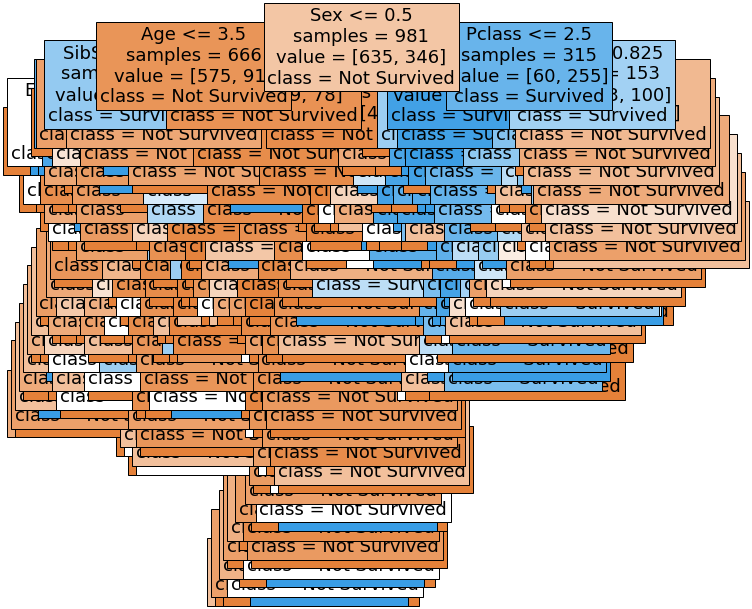

In [42]:
plt.figure(figsize=(10, 10))
plot_tree(
    model,
    feature_names=['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked'],  
    class_names=['Not Survived', 'Survived'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

#Evaluate#
Accuracy = Correct Predictions / Total Predictions

In [43]:
inputs = pd.DataFrame(X_test)
prediction_DecisionTreeClassifier = model.predict(
    inputs
)
accuracy_DecisionTreeClassifier = accuracy_score(y_test,prediction_DecisionTreeClassifier)
print(f"Accuracy score of DecisionTreeClassifier = {accuracy_DecisionTreeClassifier}")

precision_DecisionTreeClassifier = precision_score(y_test,prediction_DecisionTreeClassifier,average='weighted')
print(f"Precision score of DecisionTreeClassifier = {precision_DecisionTreeClassifier}")

Accuracy score of DecisionTreeClassifier = 0.850609756097561
Precision score of DecisionTreeClassifier = 0.8504584373147291


https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(
    X_train,
    np.ravel(y_train)
)


RandomForestClassifier()

In [45]:
inputs = pd.DataFrame(X_test)
prediction_RandomForestClassifier = model_rf.predict(
    inputs
)
accuracy_RandomForestClassifier = accuracy_score(y_test,prediction_RandomForestClassifier)
print(f"Accuracy score of RandomForestClassifier = {accuracy_RandomForestClassifier}")

precision_RandomForestClassifier = precision_score(y_test,prediction_RandomForestClassifier,average='weighted')
print(f"Precision score of RandomForestClassifier = {precision_RandomForestClassifier}")

Accuracy score of RandomForestClassifier = 0.8628048780487805
Precision score of RandomForestClassifier = 0.8631734420386071


Extremely Randomized Trees

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTreesClassifier = ExtraTreesClassifier()
model_ExtraTreesClassifier.fit(
    X_train,
    np.ravel(y_train)
)

ExtraTreesClassifier()

*Summary - Titanic dataset accuracy score*

In [47]:
inputs = pd.DataFrame(X_test)
prediction_ExtraTreesClassifier = model_ExtraTreesClassifier.predict(
    inputs
)
accuracy_ExtraTreesClassifier = accuracy_score(y_test,prediction_ExtraTreesClassifier)
print(f"Accuracy score of ExtraTreesClassifier = {accuracy_ExtraTreesClassifier}")

precision_ExtraTreesClassifier = precision_score(y_test,prediction_ExtraTreesClassifier,average='weighted')
print(f"Precision score of ExtraTreesClassifier = {precision_ExtraTreesClassifier}")

Accuracy score of ExtraTreesClassifier = 0.8414634146341463
Precision score of ExtraTreesClassifier = 0.8420469132920995


In [48]:

print(tabulate([["Accuracy",accuracy_DecisionTreeClassifier,accuracy_RandomForestClassifier,accuracy_ExtraTreesClassifier],["Precision",precision_DecisionTreeClassifier,precision_RandomForestClassifier,precision_ExtraTreesClassifier]], headers=["Metric\Model","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier"], tablefmt="grid"))

+----------------+--------------------------+--------------------------+------------------------+
| Metric\Model   |   DecisionTreeClassifier |   RandomForestClassifier |   ExtraTreesClassifier |
+================+==========================+==========================+========================+
| Accuracy       |                 0.85061  |                 0.862805 |               0.841463 |
+----------------+--------------------------+--------------------------+------------------------+
| Precision      |                 0.850458 |                 0.863173 |               0.842047 |
+----------------+--------------------------+--------------------------+------------------------+


#Cross-validated hyper-parameter optimization for our models# 

In [49]:
# Maximum number of levels in tree
tree_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
tree_max_depth.append(None)

# Number of features to consider at every split
tree_max_features = ['auto', 'sqrt', 'log2']

# Criterion 
tree_criterion = ['gini', 'entropy']

#splitter
tree_splitter = ['best', 'random']

# Minimum number of samples required to split a node
tree_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum samples leaf
tree_min_samples_leaf = [random.randint(1, 100)]


# Create the grid
tree_grid = {'max_depth': tree_max_depth,
               'max_features': tree_max_features,
               'criterion': tree_criterion,
               'min_samples_split': tree_min_samples_split,
               'min_samples_leaf': tree_min_samples_leaf}
tree_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [27]}

In [50]:
# defining our tree object with the hyper parameters discussed above
model_tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(model_tree, tree_grid, cv=5)
tree_cv.fit(
    X_train,
    y_train
)



print("Decision Tree Best Hyperparameters: {}".format(tree_cv.best_params_))
# print("Best score is {}".format(tree_cv.best_score_))


Decision Tree Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 27, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [51]:
tree_cv_best_params=tree_cv.best_params_
model_tree_Hyperparameters = DecisionTreeClassifier(min_samples_split = tree_cv_best_params['min_samples_split'], min_samples_leaf= tree_cv_best_params['min_samples_leaf'], max_features= tree_cv_best_params['max_features'], max_depth= tree_cv_best_params['max_depth'], criterion= tree_cv_best_params['criterion'])
model_tree_Hyperparameters.fit(X_train,y_train)
print(f"min_samples_split = {tree_cv_best_params['min_samples_split']}, min_samples_leaf= {tree_cv_best_params['min_samples_leaf']}, max_features= {tree_cv_best_params['max_features']}, max_depth= {tree_cv_best_params['max_depth']}, criterion= {tree_cv_best_params['criterion']}")

min_samples_split = 3, min_samples_leaf= 27, max_features= sqrt, max_depth= 5, criterion= gini


In [52]:

# inputs = pd.DataFrame(X_test)
# prediction_DecisionTreeClassifier_Hyperparameter = tree_cv.predict(
#     inputs
# )
# accuracy_DecisionTreeClassifier_Hyperparameter = accuracy_score(y_test,prediction_DecisionTreeClassifier_Hyperparameter)
# print(f"Accuracy score of DecisionTreeClassifier = {accuracy_DecisionTreeClassifier_Hyperparameter}")


inputs = pd.DataFrame(X_test)
prediction_DecisionTreeClassifier_Hyperparameter = model_tree_Hyperparameters.predict(
    inputs
)
accuracy_DecisionTreeClassifier_Hyperparameter = accuracy_score(y_test,prediction_DecisionTreeClassifier_Hyperparameter)
print(f"Accuracy score of DecisionTreeClassifier = {accuracy_DecisionTreeClassifier_Hyperparameter}")

precision_DecisionTreeClassifier_Hyperparameter = precision_score(y_test,prediction_DecisionTreeClassifier_Hyperparameter,average='weighted')
print(f"Precision score of DecisionTreeClassifier = {precision_DecisionTreeClassifier_Hyperparameter}")

Accuracy score of DecisionTreeClassifier = 0.8719512195121951
Precision score of DecisionTreeClassifier = 0.8734492488037582


#Random Forest#

In [53]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion 
rf_criterion = ['gini', 'entropy']

#splitter
rf_splitter = ['best', 'random']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
                'bootstrap': rf_bootstrap}

In [54]:
model_rf_Hyperparameter = RandomForestClassifier()

rf_cv = RandomizedSearchCV(model_rf_Hyperparameter, rf_grid, cv=5)
rf_cv.fit(
    X_train,
    np.ravel(y_train)
)


# tree_cv.get_params()
print("RandomForestClassifiers Best Hyperparameters : {}".format(rf_cv.best_params_))
# print("Best score is {}".format(rf_cv.best_score_))


RandomForestClassifiers Best Hyperparameters : {'min_samples_split': 6, 'min_impurity_decrease': 0.0, 'max_features': 'auto', 'max_depth': 35, 'criterion': 'gini', 'bootstrap': True}


In [55]:
rf_best_params = rf_cv.best_params_
model_rf_Hyperparameter = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], min_impurity_decrease = rf_best_params['min_impurity_decrease'], max_features = rf_best_params['max_features'], max_depth = rf_best_params['max_depth'], criterion = rf_best_params['criterion'], bootstrap = rf_best_params['bootstrap'])
model_rf_Hyperparameter.fit(X_train,np.ravel(y_train))

RandomForestClassifier(max_depth=35, min_samples_split=6)

In [56]:
# inputs = pd.DataFrame(X_test)
# prediction_rf_Hyperparameter = rf_cv.predict(
#     inputs
# )
# accuracy_rf_Hyperparameter = accuracy_score(y_test,prediction_rf_Hyperparameter)
# print(f"Accuracy score of RandomForestClassifier = {accuracy_rf_Hyperparameter}")


inputs = pd.DataFrame(X_test)
prediction_rf_Hyperparameter = model_rf_Hyperparameter.predict(
    inputs
)
accuracy_rf_Hyperparameter = accuracy_score(y_test,prediction_rf_Hyperparameter)
print(f"Accuracy score of RandomForestClassifier = {accuracy_rf_Hyperparameter}")

precision_rf_Hyperparameter = precision_score(y_test,prediction_rf_Hyperparameter,average='weighted')
print(f"Precision score of RandomForestClassifier = {precision_rf_Hyperparameter}")

Accuracy score of RandomForestClassifier = 0.875
Precision score of RandomForestClassifier = 0.8749389258465817


#Extra Trees Classifier#

In [57]:
# Maximum number of levels in tree
ex_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
ex_max_depth.append(None)

# Number of features to consider at every split
ex_max_features = ['sqrt', 'log2',None]

# Criterion 
ex_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
ex_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
ex_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
ex_bootstrap = [True, False]

# Create the grid
ex_grid = {'max_depth': ex_max_depth,
               'max_features': ex_max_features,
               'criterion': ex_criterion,
               'min_samples_split': ex_min_samples_split,
               'min_impurity_decrease': ex_min_impurity_decrease,
                'bootstrap': ex_bootstrap}

In [58]:
model_ex_Hyperparameter = ExtraTreesClassifier()

ex_cv = RandomizedSearchCV(model_ex_Hyperparameter, ex_grid, cv=5)
ex_cv.fit(
    X_train,
    np.ravel(y_train)
)


print("Extra Trees Classifier Best Hyperparameters: {}".format(ex_cv.best_params_))
# print("Best score is {}".format(ex_cv.best_score_))

Extra Trees Classifier Best Hyperparameters: {'min_samples_split': 9, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 35, 'criterion': 'gini', 'bootstrap': True}


In [59]:
ex_best_params = ex_cv.best_params_
model_ex_Hyperparameter = ExtraTreesClassifier(min_samples_split= ex_best_params['min_samples_split'], min_impurity_decrease = ex_best_params['min_impurity_decrease'], max_features=ex_best_params['max_features'], max_depth =ex_best_params['max_depth'], criterion= ex_best_params['criterion'], bootstrap= ['bootstrap'])

model_ex_Hyperparameter.fit(
    X_train,
    np.ravel(y_train)
)

ExtraTreesClassifier(bootstrap=['bootstrap'], max_depth=35, max_features='log2',
                     min_samples_split=9)

In [60]:
# inputs = pd.DataFrame(X_test)
# prediction_ex_Hyperparameter = ex_cv.predict(
#     inputs
# )
# accuracy_ex_Hyperparameter = accuracy_score(y_test,prediction_ex_Hyperparameter)
# print(f"Accuracy score of ExtraTreesClassifier = {accuracy_ex_Hyperparameter}")


inputs = pd.DataFrame(X_test)
prediction_ex_Hyperparameter = model_ex_Hyperparameter.predict(
    inputs
)
accuracy_ex_Hyperparameter = accuracy_score(y_test,prediction_ex_Hyperparameter)
print(f"Accuracy score of ExtraTreesClassifier = {accuracy_ex_Hyperparameter}")

precision_ex_Hyperparameter = precision_score(y_test,prediction_ex_Hyperparameter,average='weighted')
print(f"Precision score of ExtraTreesClassifier = {precision_ex_Hyperparameter}")

Accuracy score of ExtraTreesClassifier = 0.8871951219512195
Precision score of ExtraTreesClassifier = 0.8871223924223415


#Summary - Titanic dataset#

In [61]:
print("Decision Tree Best Hyperparameters:\n {}\n".format(tree_cv.best_params_))
print("RandomForestClassifiers Best Hyperparameters :\n {}\n".format(rf_cv.best_params_))
print("Extra Trees Classifier Best Hyperparameters:\n {}\n".format(ex_cv.best_params_))
print("Accuracy using the optimal hyper-parameters we found :")
print(tabulate([["Accuracy",accuracy_DecisionTreeClassifier,accuracy_RandomForestClassifier,accuracy_ExtraTreesClassifier],["Accuracy using the\noptimalhyper-parameters\nwe found",accuracy_DecisionTreeClassifier_Hyperparameter,accuracy_rf_Hyperparameter,accuracy_ex_Hyperparameter],["Precision",precision_DecisionTreeClassifier,precision_RandomForestClassifier,precision_ExtraTreesClassifier],["Precision  using the\noptimalhyper-parameters\nwe found",precision_DecisionTreeClassifier_Hyperparameter,precision_rf_Hyperparameter,precision_ex_Hyperparameter]], headers=["Model","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier"], tablefmt="grid"))

Decision Tree Best Hyperparameters:
 {'min_samples_split': 3, 'min_samples_leaf': 27, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}

RandomForestClassifiers Best Hyperparameters :
 {'min_samples_split': 6, 'min_impurity_decrease': 0.0, 'max_features': 'auto', 'max_depth': 35, 'criterion': 'gini', 'bootstrap': True}

Extra Trees Classifier Best Hyperparameters:
 {'min_samples_split': 9, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 35, 'criterion': 'gini', 'bootstrap': True}

Accuracy using the optimal hyper-parameters we found :
+-------------------------+--------------------------+--------------------------+------------------------+
| Model                   |   DecisionTreeClassifier |   RandomForestClassifier |   ExtraTreesClassifier |
+=========================+==========================+==========================+========================+
| Accuracy                |                 0.85061  |                 0.862805 |               0.841463 |
+